В цьому домашньому завданні ми знову працюємо з даними з нашого змагання ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0).

Тут ми побудуємо рішення задачі класифікації з використанням Decision Trees і зробимо новий submission на змагання на Kaggle.

В цьому ДЗ ми працюємо без pipelines, бо так буде зручніше для візуалізації і інтерпретації моделі дерева прийняття рішень. Так буває і в робочих проєктах: іноді зручніше використати sklearn.Pipelines, іноді зручніше без них. На етапі пошуку рішення (research) зручніше без пайплайнів, а з пайплайнами - коли ви відлагодили процес обробки даних і хочете поекспериментувати з різними моделями і гіперпараметрами.

**Завдання 1.**

У попередньому домашньому завданні, `HW 2.7 Логістична регресія з scikit learn.ipynb`, ми писали обробку даних для змагання. Ваше завдання зараз - за прикладом, наведеним в лекції `Майстер-клас з перенесення коду з jupyter notebook у Python модуль`, перенести попередню обробку сирих даних з вашого розв'язку ДЗ 2.7 у файл `process_bank_churn.py` в функцію `preprocess_data(...)`.

Функція `preprocess_data()` має приймати `raw_df` і вертати `X_train`, `train_targets`, `X_val`, `val_targets`, `input_cols`(перелік назв колонок, які Ви використовуєте в X), `scaler`, `encoder`, які ми потім будемо використовувати для тренування дерева прийняття рішень.


### Кроки попередньої обробки:

1. Обираємо колонки для роботи. В цьому завдання для чистоти експериментів рекомендую прибрати колонку `Surname`, так буде простіше інтрепретувати модель. Ви можете її додати вже за самостійних подальших експериментів.
2. Розбиття сирих даних на тренувальні і валідаційні.
3. Обробка категоріальних даних (one hot encoding).
4. Масштабування числових даних (було частиною попередньої обробки в попередніх завданнях). Для дерев нам не обовʼязково масштабувати ознаки, тож в коді можна зробити цю частину опціональною, додавши в `preprocess_data` параметр `scaler_numeric`, який приймає значення `True` або `False`. Це дозволить використовувати код попередньоъ обробки з різними моделями.


### Інструкції:
1. Перенесіть попередню обробку даних у файл `process_bank_churn.py`.
2. Забезпечте модулярну структуру функцій: кожна функція повинна виконувати лише одну дію, наприклад, масштабувати ознаки.
3. Додайте докстрінги до кожної функції.
4. Використовуйте typing для аргументів та значень, що повертаються функціями.
5. Передбачте обробку нових даних. Додайте спеціальну функцію `preprocess_new_data(...)`, яка приймає на вхід нові дані в вигляді pandas DataFrame та використовує вже навчені скейлер та енкодер (передані теж як аргументи фукнціх) для їх обробки. Ця функція буде корисною для обробки нових даних перед передбаченням або оцінкою моделі, коли оброблятимемо `test.csv`.

Можна і рекомендовано виконувати це завдання з ChatGPT (бажано, новіше, ніж 3.5) як було наведено у відео-прикладі, тільки **ваше додаткове завдання - розібратись з кодом, який вам згенерувала мовна модель :)**.

## В результаті цього завдання

1. Завантажте ваш готовий `process_bank_churn.py` файл на GitHub у свій репозиторій.
2. Додайте посилання на файл в репозиторії тут у ноутбуці.
3. Нижче зробіть імпорт функції `preprocess_data` з вашого модуля `process_bank_churn.py`.



In [6]:
# Файл у репозиторії:
# https://github.com/YelizavetaP/ml_tasks/blob/main/hometasks/2_supervised_learning/2_3_decision_trees/process_bank_churn.py

In [7]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [8]:
%load_ext autoreload
%autoreload 2

from process_bank_churn import preprocess_data

train_dir = '../../../data/bank-customer-churn-prediction-dlu/train.csv'
test_dir = '../../../data/bank-customer-churn-prediction-dlu/test.csv'

train_val_df = pd.read_csv(train_dir)
data = preprocess_data(train_val_df);

data['input_cols']

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


c:\Users\ASUS\Desktop\ML\ml_tasks\hometasks\2_supervised_learning\2_3_decision_trees\process_bank_churn.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[encoded_cols] = enc.transform(df[cols])
c:\Users\ASUS\Desktop\ML\ml_tasks\hometasks\2_supervised_learning\2_3_decision_trees\process_bank_churn.py:88: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[encoded_cols] = enc.transform(df[cols])


['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male']

In [9]:
data['train_X']

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8508,0.835322,0.321429,0.6,0.000000,0.333333,1.0,0.0,0.704456,1.0,0.0,0.0,1.0,0.0
8815,0.536993,0.535714,0.2,0.632928,0.000000,1.0,0.0,0.071038,0.0,1.0,0.0,1.0,0.0
11830,0.384248,0.464286,0.2,0.500472,0.000000,1.0,1.0,0.630413,0.0,1.0,0.0,1.0,0.0
10066,0.663484,0.339286,0.4,0.619047,0.333333,1.0,0.0,0.612534,0.0,1.0,0.0,1.0,0.0
9282,0.434368,0.464286,0.8,0.330907,0.333333,1.0,0.0,0.649829,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14451,0.202864,0.357143,0.6,0.531043,0.000000,1.0,0.0,0.528568,0.0,0.0,1.0,0.0,1.0
835,0.291169,0.392857,0.6,0.000000,0.000000,0.0,1.0,0.455479,0.0,0.0,1.0,1.0,0.0
13772,0.470167,0.339286,0.1,0.763415,0.000000,1.0,1.0,0.242999,0.0,0.0,1.0,1.0,0.0
13413,0.596659,0.142857,0.3,0.608476,0.000000,0.0,1.0,0.813691,1.0,0.0,0.0,1.0,0.0


In [10]:
X_train = data['train_X']
train_targets = data['train_y']
X_val = data['val_X']
val_targets = data['val_y']
scaler =  data['scaler']
encoder = data['encoder']
input_cols = data['input_cols']

In [11]:
train_targets[100:110]

4548     0.0
5889     0.0
13855    0.0
7839     1.0
14199    1.0
12696    1.0
5327     0.0
6092     0.0
1513     1.0
6753     1.0
Name: Exited, dtype: float64

**Завдання 2.**
1. Натренуйте дерево прийняття рішень з зафіксованим `random_state` і з рештою аргументів за замовченням.
2. Виведіть area under ROC для моделі на тренувальних і тестувальних даних. Нам потрібна ця метрика, бо вона основна в змаганні. Модель ок, чи є пере- або недотренування?
3. Виведіть глибину дерева.
4. Побудуйте дерево до глибини 2 включно. Напишіть, які ознаки бачите, що є найвпливовішими тут?
5. Створіть датафрейм `importance_df` з feature importances, де в першому стовпчику `feature` - назва ознаки з нашого Х, а в другому `importance` - значення, наскільки ця ознака є важливою в побудованій моделі. Виведіть топ 10 найвпливовіших ознак разом з їх скором важливості (можна або у вигляді таблиці, або в вигляді barplot).

In [12]:

# 1
tree_model = DecisionTreeClassifier(random_state=247)

In [13]:
%%time
tree_model.fit(X_train, train_targets)

CPU times: total: 31.2 ms
Wall time: 39 ms


DecisionTreeClassifier(random_state=247)

In [14]:
tree_model.score(X_train, train_targets), tree_model.score(X_val, val_targets)

(1.0, 0.847)

In [15]:
tree_model.predict(X_train)

array([0., 1., 0., ..., 0., 0., 0.])

In [16]:
train_targets

8508     0.0
8815     1.0
11830    0.0
10066    1.0
9282     0.0
        ... 
14451    0.0
835      0.0
13772    0.0
13413    0.0
2323     0.0
Name: Exited, Length: 12000, dtype: float64

In [17]:
# 2

def count_and_plot_auroc(model, inputs, targets, name=''):

    pred_proba = model.predict_proba(inputs)[:,1]
    fpr, tpr, _ = roc_curve(targets, pred_proba, pos_label=1.)
    roc_auc = auc(fpr, tpr)

    print(f'AUROC for {name}: {roc_auc:.2f}')
    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
    plt.legend(loc="lower right")
    plt.show()

AUROC for Train Data: 1.00


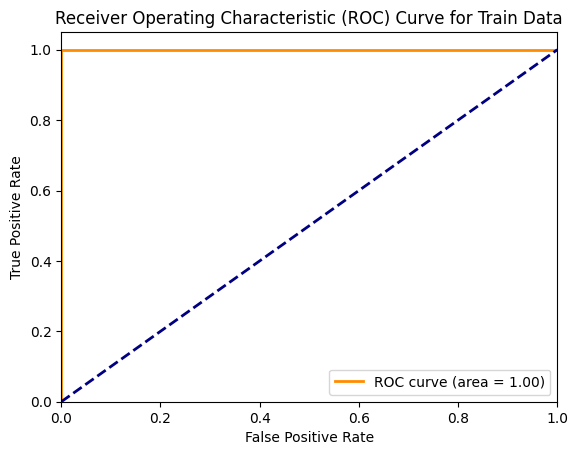

In [18]:
count_and_plot_auroc(tree_model, X_train, train_targets, 'Train Data')

AUROC for Val Data: 0.77


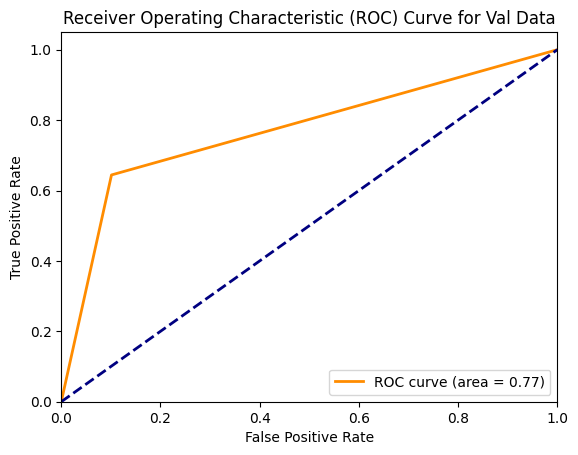

In [19]:
count_and_plot_auroc(tree_model, X_val, val_targets, 'Val Data')

In [20]:
# 3
tree_model.get_depth()

26

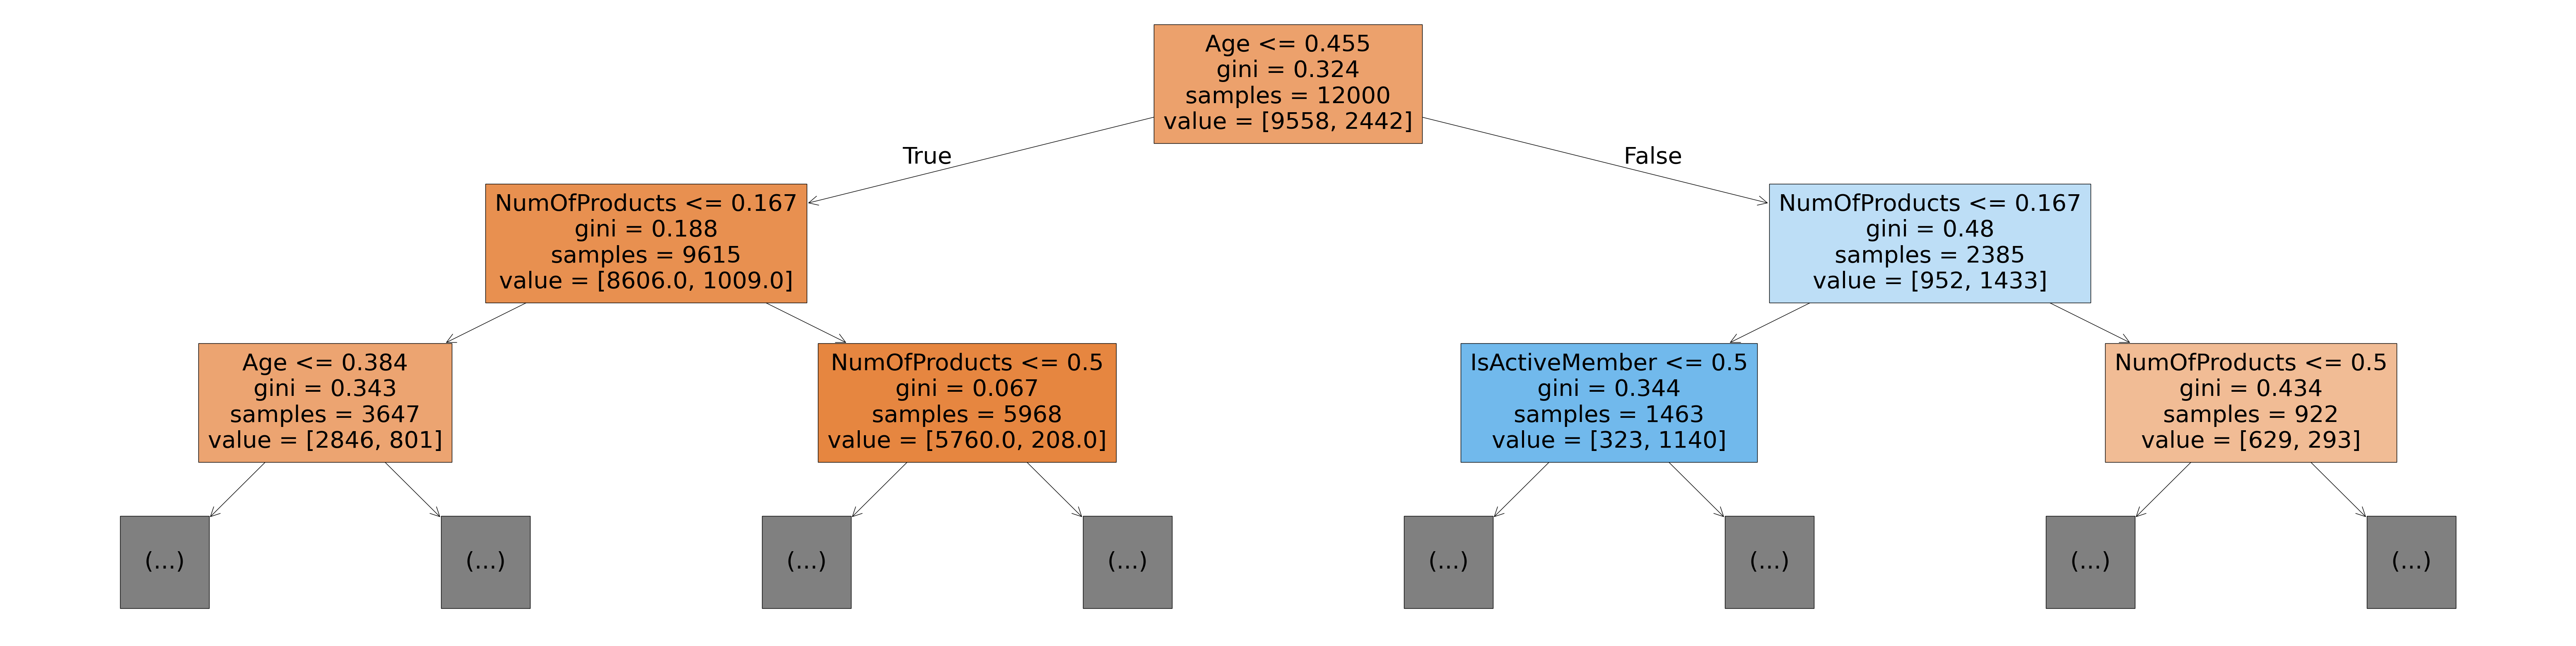

In [21]:
# 4
plt.figure(figsize=(80,20))
plot_tree(tree_model, feature_names=X_train.columns, max_depth=2, filled=True);

Найважливішими в отриманому дереві є ознаки `Age`, `NumOfProducts`

In [22]:
# 5
import  seaborn as sns

def show_feature_importance(model):

    importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.title('Feature Importance')
    sns.barplot(data=importance_df.head(10), x='importance', y='feature')

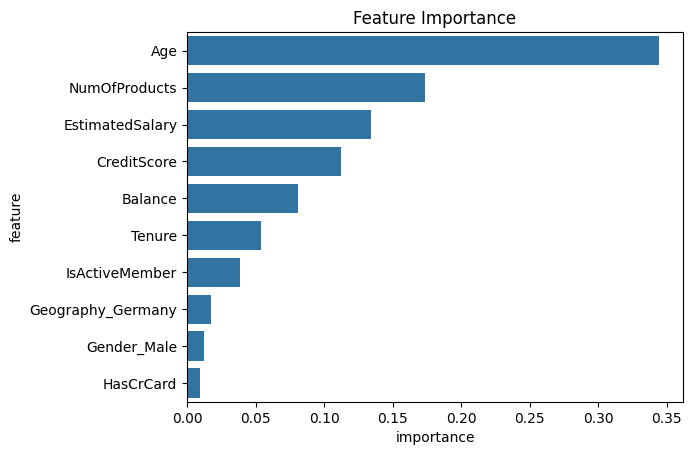

In [23]:
show_feature_importance(tree_model)

Отримана модель ідеально класифікує тренувальні дані і значно гірше валідаційні, що свідчить про перенавчання

**Завдання 3**. Спробуйте знайти такі параметри моделі `DecisionTree` аби модель генералізувала ліпше (був вищий показник AUROC на валідаційній вибірці). Проекспериментуйте з різними значеннями параметрів `max_leaf_nodes`, `max_depth` та лишіть ті, які дають найкращий результат, разом з відповідними AUROC на тренувальній і валідаційній вибірках.

В цьому завданні спробуйте просто знайти параметри методом "тика" :)

AUROC for Training: 0.93


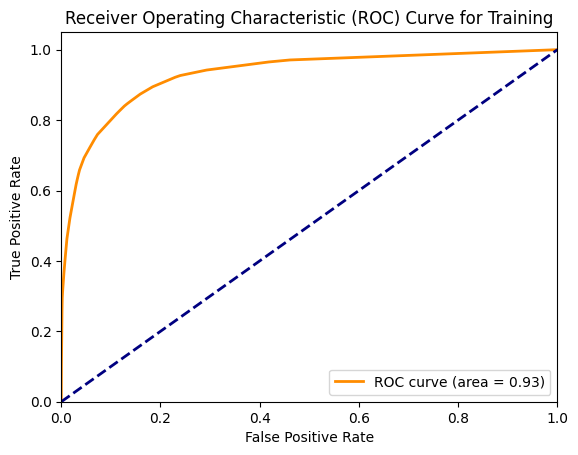

In [24]:
model = DecisionTreeClassifier(random_state=42, max_leaf_nodes=40, max_depth=6).fit(X_train, train_targets)
count_and_plot_auroc(model, X_train, train_targets, 'Training')

AUROC for Validation: 0.92


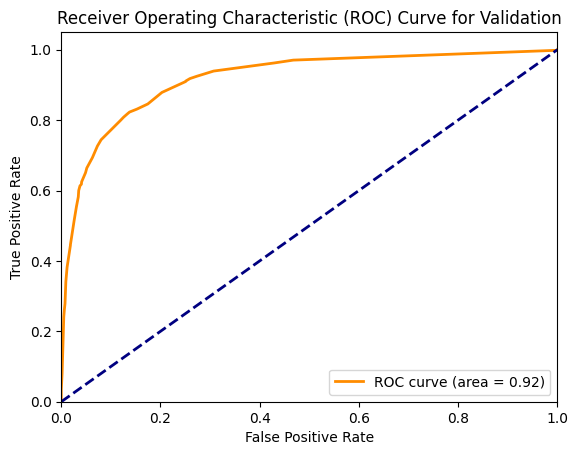

In [25]:
count_and_plot_auroc(model, X_val, val_targets, 'Validation')

**Завдання 4**. В циклі пройдіться по значенням max_depth від 1 до 20 включно, на кожній ітерації натренуйте DecisionTree модель і виміряйте AUROC на трейн і валідаційних даних.

В кінці виведіть на графік залеєність між AUROC на трейн і валідаційних даних і номером ітерації.

In [26]:
def get_auc(md):

    model = DecisionTreeClassifier(random_state=42, max_depth=md).fit(X_train, train_targets)

    train_pred_proba = model.predict_proba(X_train)[:,1]
    val_pred_proba = model.predict_proba(X_val)[:,1]

    train_fpr, train_tpr, _ = roc_curve(train_targets, train_pred_proba, pos_label=1.)
    val_fpr, val_tpr, _ = roc_curve(val_targets, val_pred_proba, pos_label=1.)

    train_roc_auc = auc(train_fpr, train_tpr)
    val_roc_auc = auc(val_fpr, val_tpr)

    return {'Max Depth': md, 'Training AUC': train_roc_auc,'Validation AUC': val_roc_auc}


errors_df = pd.DataFrame([get_auc(md) for md in range(1, 21)])
errors_df.style.background_gradient(subset='Validation AUC', cmap='Blues')

,Max Depth,Training AUC,Validation AUC
0,1,0.743606,0.739344
1,2,0.843094,0.846146
2,3,0.897301,0.891045
3,4,0.912672,0.904623
4,5,0.926527,0.913751
5,6,0.934072,0.917544
6,7,0.940894,0.914441
7,8,0.948895,0.895244
8,9,0.959609,0.885426
9,10,0.970360,0.854923


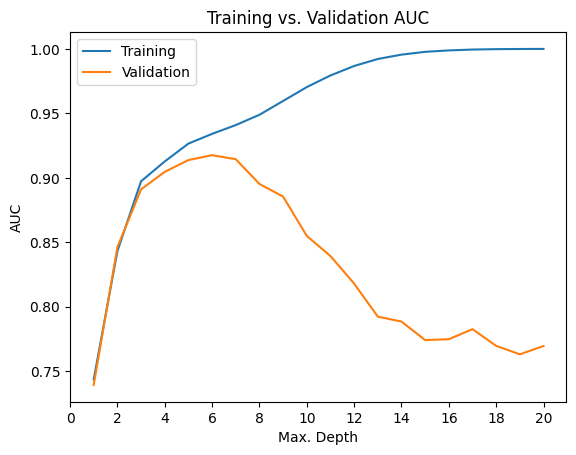

In [27]:
plt.figure()
plt.plot(errors_df['Max Depth'], errors_df['Training AUC'])
plt.plot(errors_df['Max Depth'], errors_df['Validation AUC'])
plt.title('Training vs. Validation AUC')
plt.xticks(range(0,21, 2))
plt.xlabel('Max. Depth')
plt.ylabel('AUC')
plt.legend(['Training', 'Validation']);

**Завдання 5**.
1. Натренуйте модель `DecisionTree` з найкращим значенням `max_depth`, яке ви знайшли на попередній ітерації.
2. Завантажте тестові дані змагання з `test.csv`.
3. Зробіть попередню обробку даних з функцією `preprocess_new_data` з вашого модуля `process_bank_churn.py`.
4. Зробіть передбачення використовуючи цю модель на тестових даних змагання.
5. Сформуйте `submission.csv`.
6. Зробіть новий Submission на Kaggle і додайте тут скріншот Вашого скору на паблік лідерборді :)


In [28]:
final_model = DecisionTreeClassifier(random_state=42, max_depth=6).fit(X_train, train_targets)

AUROC for Train: 0.93


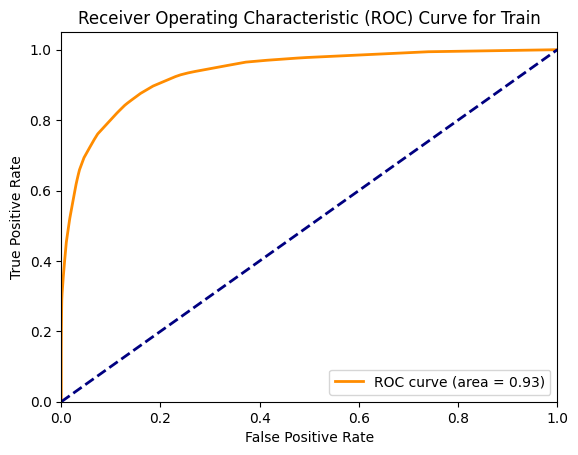

In [29]:
count_and_plot_auroc(final_model, X_train, train_targets, 'Train')

AUROC for Val: 0.92


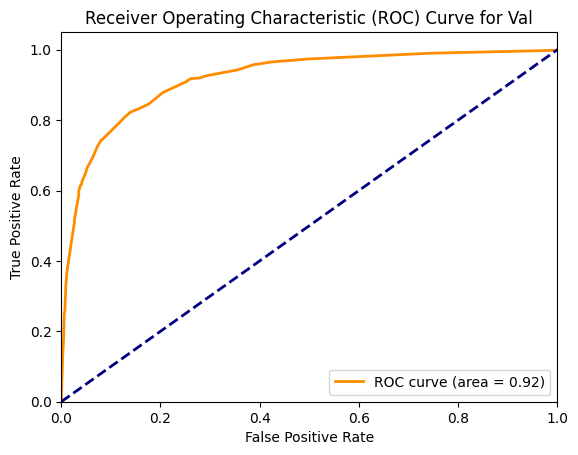

In [30]:
count_and_plot_auroc(final_model, X_val, val_targets, 'Val')


In [215]:
test_df = pd.read_csv(test_dir, index_col='id')
test_df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
id,,,,,,,,,,,,
15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86
15001,15642821.0,Mazzi,551.0,France,Male,39.0,5.0,0.00,2.0,1.0,1.0,67431.28
15002,15716284.0,Onyekachi,706.0,France,Male,43.0,8.0,0.00,2.0,1.0,0.0,156768.45
15003,15785078.0,Martin,717.0,Spain,Male,45.0,3.0,0.00,1.0,1.0,1.0,166909.87
15004,15662955.0,Kenechukwu,592.0,Spain,Male,43.0,8.0,0.00,2.0,1.0,1.0,143681.97


In [216]:
from process_bank_churn import preprocess_new_data

X_test = preprocess_new_data(test_df.copy(), encoder, scaler)
X_test.head(5)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,,
15000,0.984487,0.365155,0.214286,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0
15001,0.987861,0.286396,0.375000,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0
15002,0.993022,0.656325,0.446429,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0
15003,0.997855,0.682578,0.482143,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0
15004,0.989275,0.384248,0.446429,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0


In [217]:
sample_submission_dir = '../../../data/bank-customer-churn-prediction-dlu/sample_submission.csv'
submission = pd.read_csv(sample_submission_dir, index_col=0)

test_preds = final_model.predict_proba(X_test)[:, 1]
submission['Exited'] = test_preds

submission.to_csv('../../../data/bank-customer-churn-prediction-dlu/submissions/submission_tree_d6.csv')


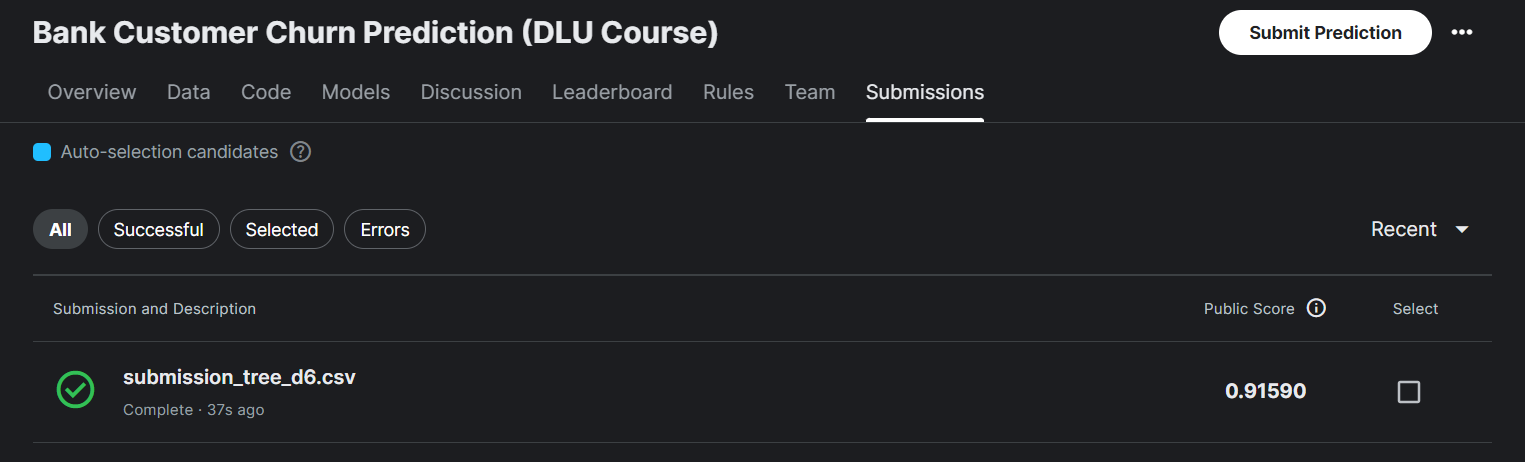